## Tensorflow Fractal Geometry  

With Tensorflow, formalize how to work with what's described at the end of Techniques in Fractal Geometry by Kenneth Falconer: "there are certain circumstances when it is appropriate to seek solutions of a 'differential equation' defined on a set that is itself fractal, <b>for example when modelling conduction of</b> heat or <b>electricity through a highly porous material</b>."  

Here be buried theoretical biotech treasure guarded by mathematical dragons.  

#### General Models
* Lorenz Attractor   
* Reaction-Diffusion <i>(Future)</i>  
* Heat Equation on Regions with a Fractal Boundary <i>(Future)</i>  

#### Non-Linear Oscillators
* Damped SHM  
* Izhikevich  <i>(Future)</i>  
* Fitzhugh-Nagumo  
* Hodgkins-Huxley  <i>(Future)</i>  


In [2]:
# Shebang Shiznat Borgersnot
import tensorflow as tf
import numpy as np
import tqdm
import TensorFlowDiffEq as diff_eq
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [ ]:
# Helper Functions

def create_


#### Lorenz Attractor Formulation  

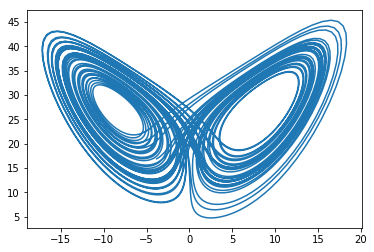

In [3]:
rho = 28.0
sigma = 10.0
beta = 8.0/3.0

def lorenz_equation(state, t):
  x, y, z = tf.unstack(state)
  dx = sigma * (y - x)
  dy = x * (rho - z) - y
  dz = x * y - beta * z
  return tf.stack([dx, dy, dz])

init_state = tf.constant([0, 2, 20], dtype=tf.float64)
t = np.linspace(0, 50, num=5000)
tensor_state, tensor_info = tf.contrib.integrate.odeint(
    lorenz_equation, init_state, t, full_output=True)

sess = tf.Session()
state, info = sess.run([tensor_state, tensor_info])
x, y, z = state.T
plt.plot(x, z)

#### Reaction-Diffusion Formulation  

In [8]:
# Borked until PDEs on fractal boundaries work

#### Damped SHM Formulation

100%|██████████| 2000/2000 [00:06<00:00, 304.85it/s]
No handles with labels found to put in legend.


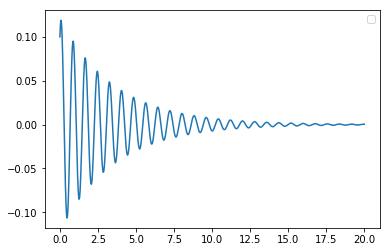

In [9]:
# Ye Olde Mouldy Funktion

# def DampedSHM(r=None, s=None, m=None):
#     def model(x, t, r=r, s=s, m=m):
#         return array([x[1],
#                      (-r*x[1] - s*x[0])/m])
#     return model

eq = diff_eq.DifferentialEquation()

(xy,) = eq.generate_quantities(1)

r = 0.035
s = 0.5
m = 0.2

eq.define_quantity(xy, np.array([0.1, 0.1]), 0, 1)(tf.stack([xy.d(0)[1],
                                                            (-r * xy.d(0)[1] - s * xy.d(0)[0])/m]))

# Start tensorflow session
sess = tf.Session()
sess.run(tf.initialize_all_variables())
simulate_op = eq.generate_simulate_operation(0.025)

xs = np.zeros(2000)
ys = np.zeros(2000)
ts = np.zeros(2000)
(x, y) = (xy.d(0)[0], xy.d(0)[1])
for i in tqdm.tqdm(range(2000)):
    xs[i] = sess.run(x)
    ys[i] = sess.run(y)
    if i < 1999:
        sess.run(simulate_op)
        sess.run(simulate_op)
        ts[i+1] = ts[i] + 0.01

fig = plt.figure()
plt.plot(ts, xs)
plt.legend()

plt.show()


#### Fitzhugh-Nagumo Formulation

100%|██████████| 2000/2000 [00:05<00:00, 394.55it/s]
No handles with labels found to put in legend.


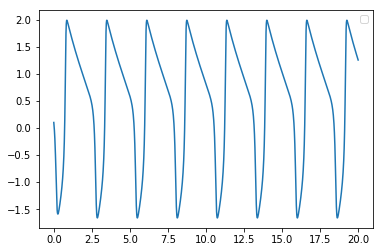

In [10]:
# xdot = c(xdot + ydot - (xdot**3/3) + i)
# ydot = -1/c(xdot - a + b*ydot)

# Where:     a = (0.75, a)[a is not None]
#            b = (0.8, b)[b is not None]
#            c = (3, c)[c is not None]
#            i = (-0.4, i)[i is not None]

eq = diff_eq.DifferentialEquation()

(xy,) = eq.generate_quantities(1)

# and the parameters
a = 0.75
b = 0.8
c = 3
i = -0.4

# The Fitzhugh-Nagumo equations
eq.define_quantity(xy, np.array([0.1, 0.1]), 0, 1)(tf.stack([c * (xy.d(0)[0] + xy.d(0)[1] - (xy.d(0)[0]**3/3) + i),
                                                            -1/c * (xy.d(0)[0] - a + b*xy.d(0)[1])]))

# Start tensorflow session
sess = tf.Session()
sess.run(tf.initialize_all_variables())
simulate_op = eq.generate_simulate_operation(0.025)

xs = np.zeros(2000)
ys = np.zeros(2000)
ts = np.zeros(2000)
(x, y) = (xy.d(0)[0], xy.d(0)[1])
for i in tqdm.tqdm(range(2000)):
    xs[i] = sess.run(x)
    ys[i] = sess.run(y)
    if i < 1999:
        sess.run(simulate_op)
        sess.run(simulate_op)
        ts[i+1] = ts[i] + 0.01

fig = plt.figure()
plt.plot(ts, xs)
plt.legend()

plt.show()


#### Izhikevich Formulation

#### Hodgkin-Huxley Formulation